# Приведём даты к типу datetime, а числа - к float


In [ ]:
!pip install pandas
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import locale
from datetime import datetime



In [ ]:
df = pd.read_csv('blok.csv')
df.head()
df['Длительность'] = (pd.to_numeric(df['Длительность'], errors='coerce'))

month_mapping = {
    "янв": "Jan", "фев": "Feb", "мар": "Mar", "апр": "Apr",
    "май": "May", "июн": "Jun", "июл": "Jul", "авг": "Aug",
    "сен": "Sep", "окт": "Oct", "ноя": "Nov", "дек": "Dec"
}

# Устанавливаем английскую локаль (на Windows может не работать)
try:
    locale.setlocale(locale.LC_TIME, "en_US.UTF-8")
except locale.Error:
    print("Локаль не поддерживается, но продолжаем без неё.")

# Словарь соответствий русских и английских месяцев
month_mapping = {
    "янв": "Jan", "фев": "Feb", "мар": "Mar", "апр": "Apr",
    "май": "May", "июн": "Jun", "июл": "Jul", "авг": "Aug",
    "сен": "Sep", "окт": "Oct", "ноя": "Nov", "дек": "Dec"
}

# Функция преобразования
def convert_to_datetime(date_str):
    # print(date_str)
    # print(type(date_str))
    if not pd.isna(date_str):
        date_str = date_str.strip().replace("\xa0", " ")  # Убираем невидимые пробелы
        for ru_month, en_month in month_mapping.items():
            if ru_month in date_str:
                date_str = date_str.replace(ru_month, en_month)
                break  # Нашли и заменили месяц
        # print(f"Final processed string: {date_str}")  # Проверяем финальный вид строки
        return pd.to_datetime(date_str, format="%d-%b-%y %H:%M:%S", errors="coerce")







# df["Начало простоя"] = df["Начало простоя"].apply(lambda x: datetime.strptime(x, "%d-%b-%y %H:%M:%S"))
# df['Начало простоя'] = pd.to_datetime(df['Начало простоя'], format="%d-%b-%y %H:%M:%S", dayfirst=True)
df["Начало простоя"] = df["Начало простоя"].apply(convert_to_datetime)
df["Конец простоя"] = df["Конец простоя"].apply(convert_to_datetime)
# df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Начало простоя  531 non-null    datetime64[ns]
 1   Конец простоя   531 non-null    datetime64[ns]
 2   Reason 3 (ID)   531 non-null    float64       
 3   Reason 3 (ENG)  531 non-null    object        
 4   Описание        531 non-null    object        
 5   Длительность    531 non-null    float64       
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 25.1+ KB


# Сделаем обзорный анализ - как часто и сколь долго аппарат простаивает

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Добавляем колонки для группировки
df["Год"] = df["Начало простоя"].dt.year
df["Месяц"] = df["Начало простоя"].dt.to_period("M")  # Группировка по месяцам
df["Неделя"] = df["Начало простоя"].dt.to_period("W")  # Группировка по неделям

# Группировка и вычисление среднего
mean_downtime_yearly = df.groupby("Год")["Длительность"].mean()
mean_downtime_monthly = df.groupby("Месяц")["Длительность"].mean()
mean_downtime_weekly = df.groupby("Неделя")["Длительность"].mean()


## Числовые данные

In [ ]:
print("Среднее время простоя по годам (мин):\n", mean_downtime_yearly)
print("\nСреднее время простоя по месяцам (мин):\n", mean_downtime_monthly)
print("\nСреднее время простоя по неделям (мин):\n", mean_downtime_weekly)


Среднее время простоя по годам (мин):
 Год
2020.0    4.801653
2021.0    5.840580
2022.0    7.592105
2023.0    4.888889
2024.0    8.966667
Name: Длительность, dtype: float64

Среднее время простоя по месяцам (мин):
 Месяц
2020-01     6.500000
2020-02     3.571429
2020-03     4.875000
2020-04     4.545455
2020-05     4.142857
2020-06     4.500000
2020-07     4.238095
2020-08     4.000000
2020-09     7.823529
2020-10     4.615385
2020-11     7.000000
2020-12     3.500000
2021-01     4.000000
2021-02     3.000000
2021-03     4.750000
2021-04     3.500000
2021-05    15.600000
2021-06     4.434783
2021-07     8.153846
2021-08     4.666667
2021-09     6.235294
2021-10     5.812500
2021-11     6.550000
2021-12     4.727273
2022-01    40.333333
2022-02     5.472222
2022-03     5.000000
2022-04     5.000000
2022-05    18.666667
2022-06     4.500000
2022-07    23.000000
2022-08     4.625000
2022-09    20.428571
2022-10     5.476190
2022-11     5.700000
2022-12     4.000000
2023-01     3.625000
20

## Визуализация

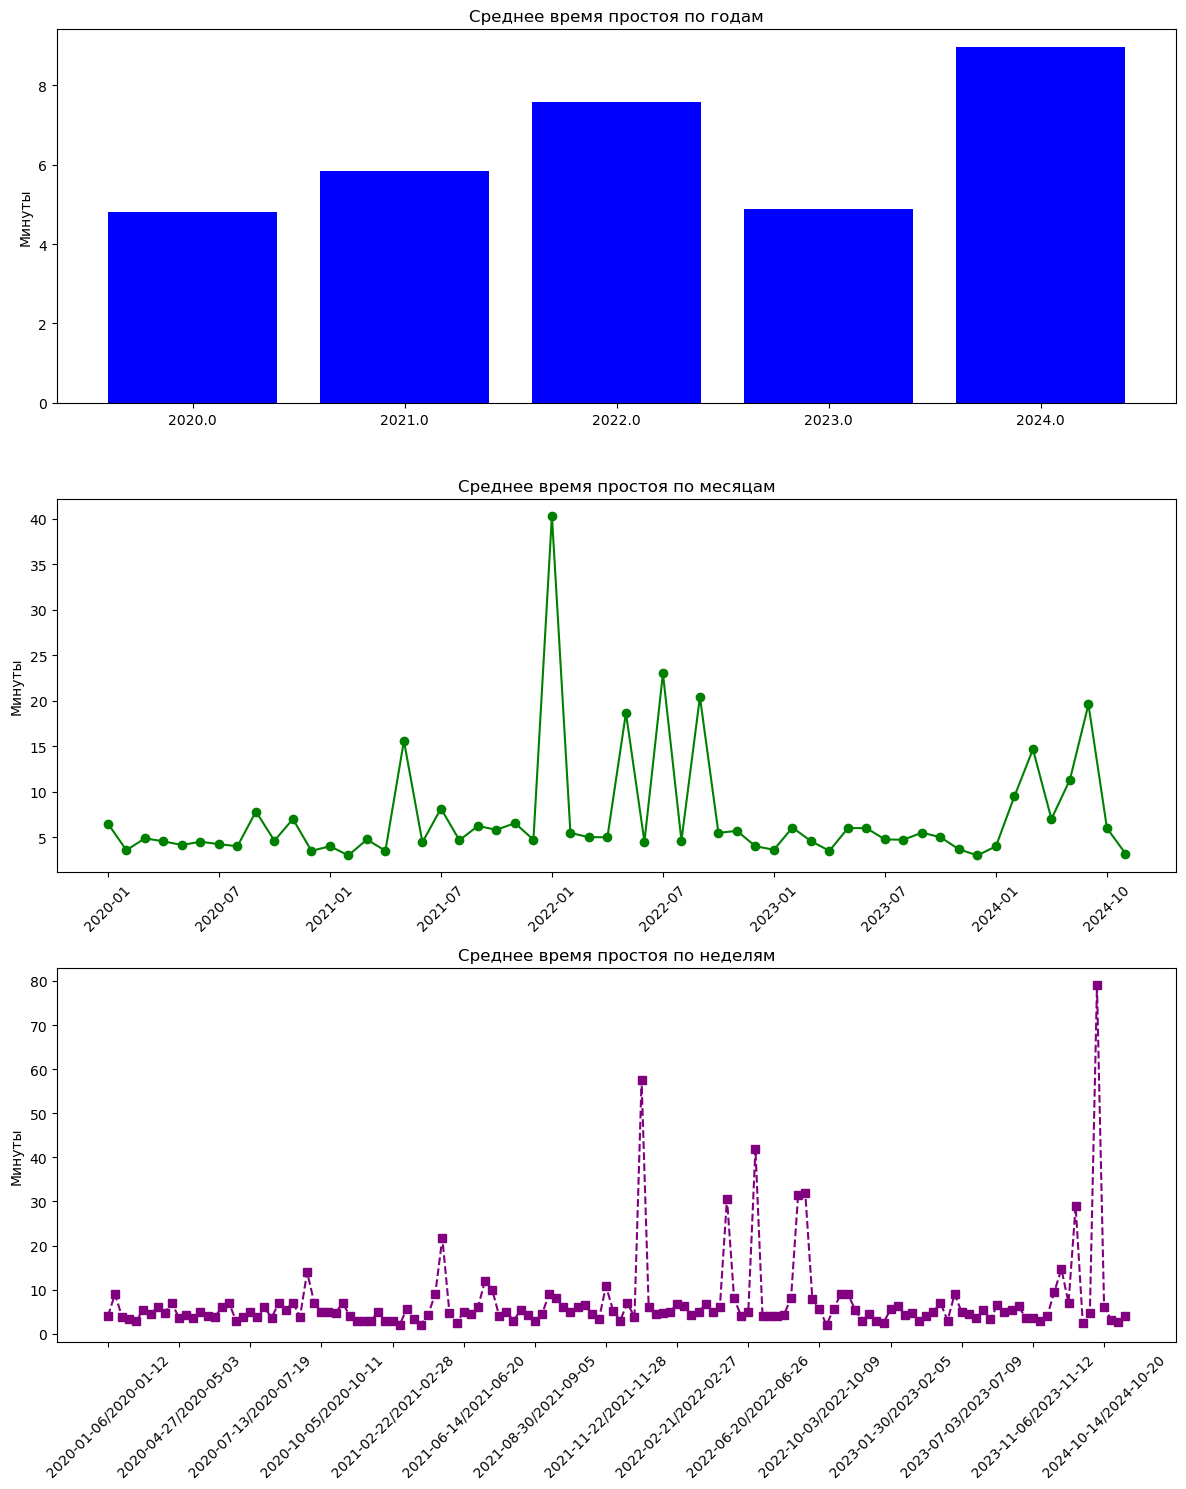

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# График по годам
axes[0].bar(mean_downtime_yearly.index.astype(str), mean_downtime_yearly, color="blue")
axes[0].set_title("Среднее время простоя по годам")
axes[0].set_ylabel("Минуты")

# График по месяцам (с разреженными подписями)
axes[1].plot(mean_downtime_monthly.index.astype(str), mean_downtime_monthly, marker="o", linestyle="-", color="green")
axes[1].set_title("Среднее время простоя по месяцам")
axes[1].set_ylabel("Минуты")

# Оставляем подписи только раз в 6 месяцев
month_labels = mean_downtime_monthly.index.astype(str)
step = 6  # Раз в 6 месяцев
axes[1].set_xticks(range(0, len(month_labels), step))
axes[1].set_xticklabels(month_labels[::step], rotation=45)
plt.savefig("output1.jpg")

# График по неделям (разреженные подписи)
axes[2].plot(mean_downtime_weekly.index.astype(str), mean_downtime_weekly, marker="s", linestyle="--", color="purple")
axes[2].set_title("Среднее время простоя по неделям")
axes[2].set_ylabel("Минуты")
plt.savefig("output2.jpg")

# Оставляем подписи раз в 10 недель
week_labels = mean_downtime_weekly.index.astype(str)
step = 10  # Раз в 10 недель
axes[2].set_xticks(range(0, len(week_labels), step))
axes[2].set_xticklabels(week_labels[::step], rotation=45)
plt.savefig("output3.jpg")

# Улучшаем внешний вид
plt.tight_layout()
plt.savefig("output.jpg")

plt.show()

In [ ]:
df

,Начало простоя,Конец простоя,Reason 3 (ID),Reason 3 (ENG),Описание,Длительность,Год,Месяц,Неделя
0,2020-01-08 02:04:44,2020-01-08 02:08:29,2010004.0,Breakdowns,Замена двух дросселей на наполнителе №17,4.0,2020.0,2020-01,2020-01-06/2020-01-12
1,2020-01-28 09:11:45,2020-01-28 09:20:46,2010004.0,Breakdowns,Замена первого ролика на столике №1,9.0,2020.0,2020-01,2020-01-27/2020-02-02
2,2020-02-05 10:40:01,2020-02-05 10:42:23,2010004.0,Breakdowns,Замена нагнетательного дросселя №89,2.0,2020.0,2020-02,2020-02-03/2020-02-09
3,2020-02-06 10:59:58,2020-02-06 11:04:09,2010004.0,Breakdowns,Замена нагнетательного дросселя №105,4.0,2020.0,2020-02,2020-02-03/2020-02-09
4,2020-02-06 19:02:48,2020-02-06 19:05:07,2010004.0,Breakdowns,Замена тормозной пластины №76,2.0,2020.0,2020-02,2020-02-03/2020-02-09
...,...,...,...,...,...,...,...,...,...
527,2024-11-04 19:15:34,2024-11-04 19:17:41,2010004.0,Breakdowns,Замена тормозной пластины на 66 наполнителе,2.0,2024.0,2024-11,2024-11-04/2024-11-10
528,2024-11-05 09:48:48,2024-11-05 09:51:31,2010004.0,Breakdowns,замена тормозной пластины,3.0,2024.0,2024-11,2024-11-04/2024-11-10
529,2024-11-21 03:12:49,2024-11-21 03:16:28,2010004.0,Breakdowns,МЕХ. Недолив. Пустые банки. 20/32/33/39,4.0,2024.0,2024-11,2024-11-18/2024-11-24
530,2024-11-21 03:24:45,2024-11-21 03:28:36,2010004.0,Breakdowns,МЕХ. Недолив. Пустые банки. 20/32/33/39,4.0,2024.0,2024-11,2024-11-18/2024-11-24


In [ ]:
df["Год"] = df["Начало простоя"].dt.year
df["Месяц"] = df["Начало простоя"].dt.to_period("M")  # Группировка по месяцам
df["Неделя"] = df["Начало простоя"].dt.to_period("W")  # Группировка по неделям

# Рассчитываем среднее время простоя для каждого периода
lambda_week = df.groupby("Неделя")["Длительность"].mean().rename("λ_неделя")
lambda_month = df.groupby("Месяц")["Длительность"].mean().rename("λ_месяц")
lambda_year = df.groupby("Год")["Длительность"].mean().rename("λ_год")

# Добавляем коэффициенты обратно в исходный датафрейм
df = df.merge(lambda_week, on="Неделя", how="left")
df = df.merge(lambda_month, on="Месяц", how="left")
df = df.merge(lambda_year, on="Год", how="left")

# Выводим результат
df.head()


,Начало простоя,Конец простоя,Reason 3 (ID),Reason 3 (ENG),Описание,Длительность,Год,Месяц,Неделя,λ_неделя,λ_месяц,λ_год
0,2020-01-08 02:04:44,2020-01-08 02:08:29,2010004.0,Breakdowns,Замена двух дросселей на наполнителе №17,4.0,2020.0,2020-01,2020-01-06/2020-01-12,4.00,6.500000,4.801653
1,2020-01-28 09:11:45,2020-01-28 09:20:46,2010004.0,Breakdowns,Замена первого ролика на столике №1,9.0,2020.0,2020-01,2020-01-27/2020-02-02,9.00,6.500000,4.801653
2,2020-02-05 10:40:01,2020-02-05 10:42:23,2010004.0,Breakdowns,Замена нагнетательного дросселя №89,2.0,2020.0,2020-02,2020-02-03/2020-02-09,3.75,3.571429,4.801653
3,2020-02-06 10:59:58,2020-02-06 11:04:09,2010004.0,Breakdowns,Замена нагнетательного дросселя №105,4.0,2020.0,2020-02,2020-02-03/2020-02-09,3.75,3.571429,4.801653
4,2020-02-06 19:02:48,2020-02-06 19:05:07,2010004.0,Breakdowns,Замена тормозной пластины №76,2.0,2020.0,2020-02,2020-02-03/2020-02-09,3.75,3.571429,4.801653


In [ ]:
df.describe()
df.head()

,Начало простоя,Конец простоя,Reason 3 (ID),Reason 3 (ENG),Описание,Длительность,Год,Месяц,Неделя,λ_неделя,λ_месяц,λ_год
0,2020-01-08 02:04:44,2020-01-08 02:08:29,2010004.0,Breakdowns,Замена двух дросселей на наполнителе №17,4.0,2020.0,2020-01,2020-01-06/2020-01-12,4.00,6.500000,4.801653
1,2020-01-28 09:11:45,2020-01-28 09:20:46,2010004.0,Breakdowns,Замена первого ролика на столике №1,9.0,2020.0,2020-01,2020-01-27/2020-02-02,9.00,6.500000,4.801653
2,2020-02-05 10:40:01,2020-02-05 10:42:23,2010004.0,Breakdowns,Замена нагнетательного дросселя №89,2.0,2020.0,2020-02,2020-02-03/2020-02-09,3.75,3.571429,4.801653
3,2020-02-06 10:59:58,2020-02-06 11:04:09,2010004.0,Breakdowns,Замена нагнетательного дросселя №105,4.0,2020.0,2020-02,2020-02-03/2020-02-09,3.75,3.571429,4.801653
4,2020-02-06 19:02:48,2020-02-06 19:05:07,2010004.0,Breakdowns,Замена тормозной пластины №76,2.0,2020.0,2020-02,2020-02-03/2020-02-09,3.75,3.571429,4.801653


In [ ]:
from math import e

def reliability_f(time):
    lambda_coef = 6.9
    reliability_f = pow(e, -lambda_coef)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Вычисляем надежность
df["reliability_неделя"] = np.exp(-df["λ_неделя"])
df["reliability_месяц"] = np.exp(-df["λ_месяц"])
df["reliability_год"] = np.exp(-df["λ_год"])

# Функция для построения графиков
def plot_metric(metric, title, xlabel):
    df_grouped = df.groupby(xlabel)[metric].mean()  # Усредняем по периодам
    plt.figure(figsize=(12, 5))
    plt.plot(df_grouped.index.astype(str), df_grouped, marker="o", linestyle="-")
    plt.xticks(rotation=45)
    plt.title(title)
    plt.xlabel(xlabel[::100])
    plt.ylabel(metric)
    plt.grid(True)
    plt.show()




Построим еще пару графиков

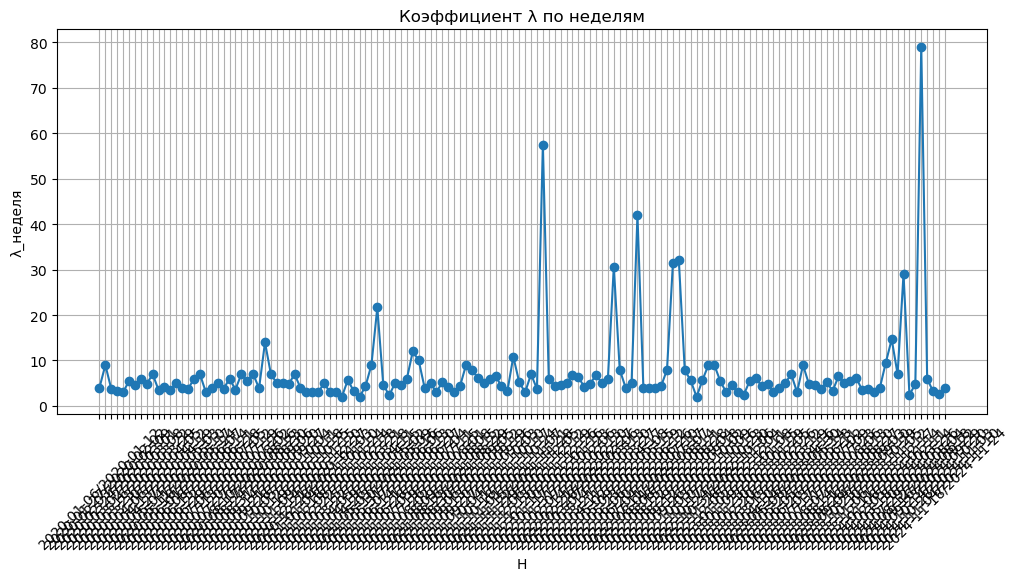

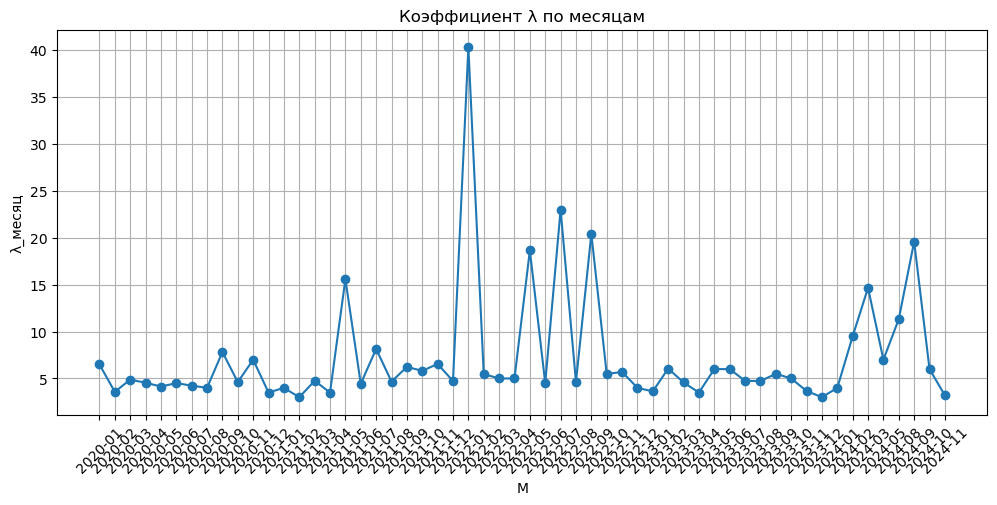

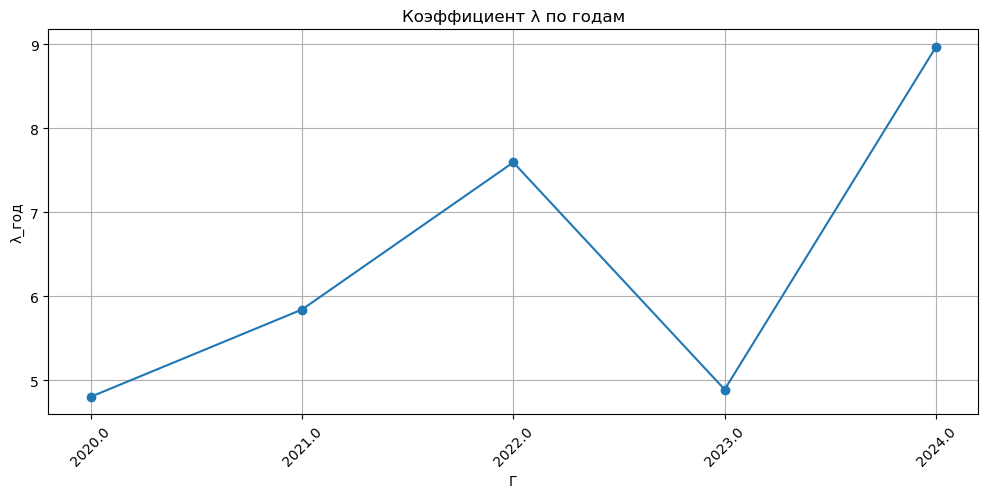

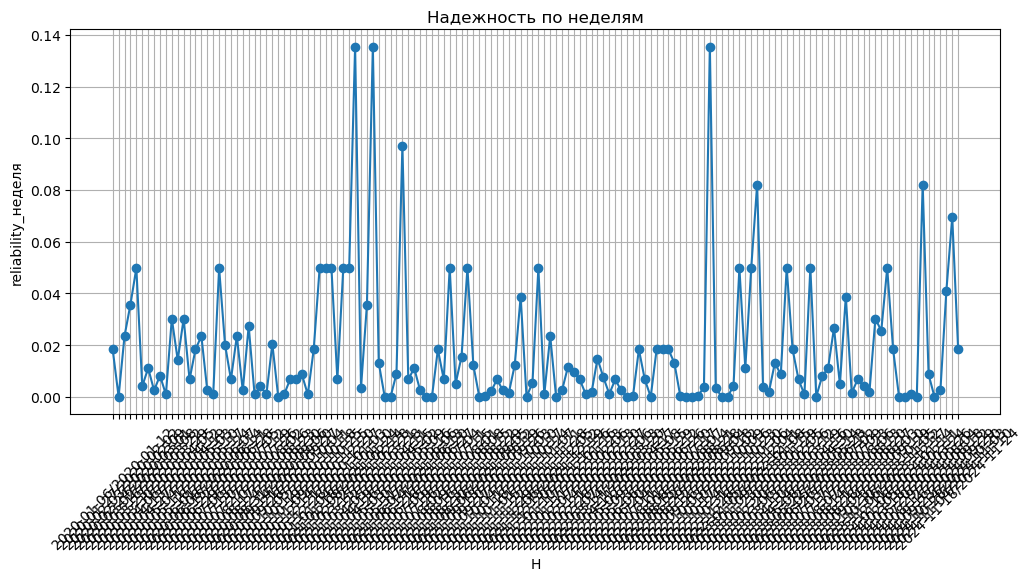

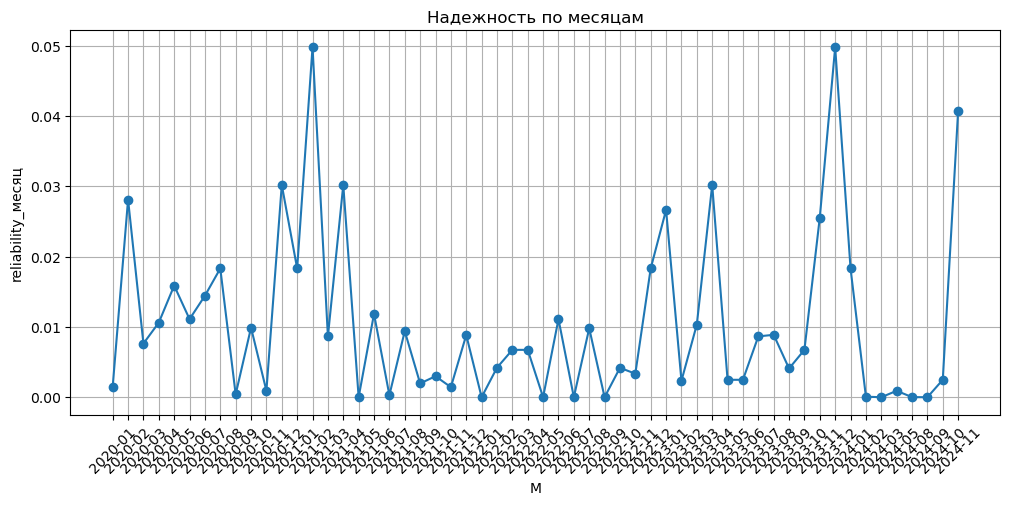

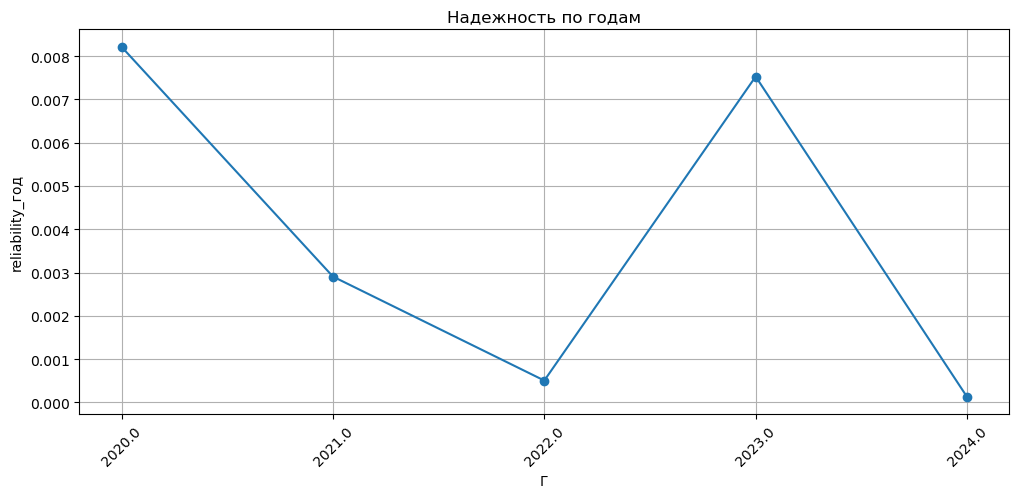

In [ ]:
plot_metric("λ_неделя", "Коэффициент λ по неделям", "Неделя")
plot_metric("λ_месяц", "Коэффициент λ по месяцам", "Месяц")
plot_metric("λ_год", "Коэффициент λ по годам", "Год")

# Строим графики надежности
plot_metric("reliability_неделя", "Надежность по неделям", "Неделя")
plot_metric("reliability_месяц", "Надежность по месяцам", "Месяц")
plot_metric("reliability_год", "Надежность по годам", "Год")

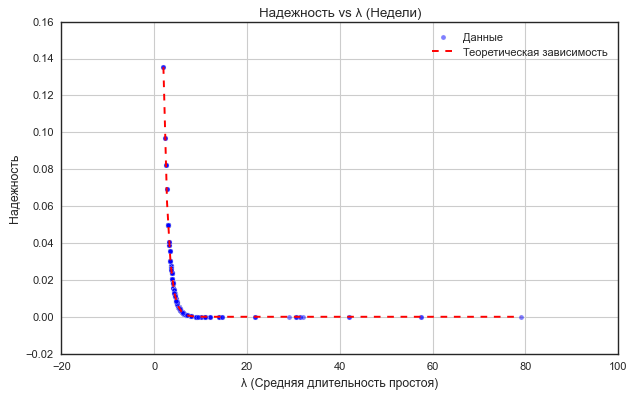

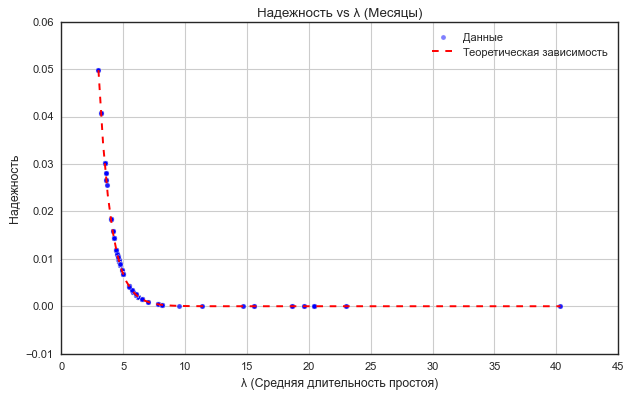

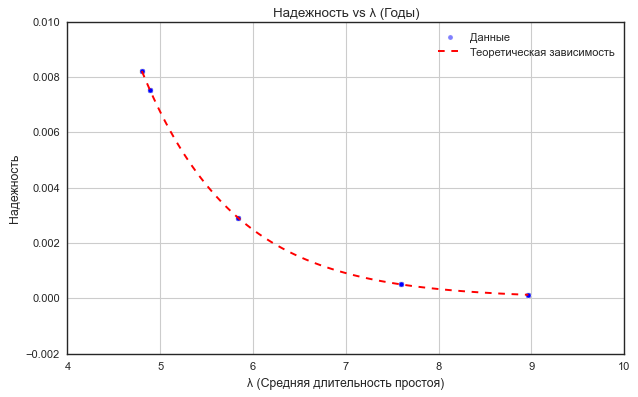

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для построения зависимости надежности от коэффициента λ
def plot_reliability_vs_lambda(lambda_col, reliability_col, title):
    plt.figure(figsize=(8, 5))
    plt.scatter(df[lambda_col], df[reliability_col], alpha=0.5, label="Данные")  # Точки данных
    lambda_range = np.linspace(df[lambda_col].min(), df[lambda_col].max(), 100)
    plt.plot(lambda_range, np.exp(-lambda_range), color="red", linestyle="--", label="Теоретическая зависимость")  # Теоретическая экспонента
    plt.xlabel("λ (Средняя длительность простоя)")
    plt.ylabel("Надежность")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Строим зависимости
plot_reliability_vs_lambda("λ_неделя", "reliability_неделя", "Надежность vs λ (Недели)")
plot_reliability_vs_lambda("λ_месяц", "reliability_месяц", "Надежность vs λ (Месяцы)")
plot_reliability_vs_lambda("λ_год", "reliability_год", "Надежность vs λ (Годы)")


In [ ]:

from math import e
df["Интервал_между_поломками"] = df["Начало простоя"].diff().dt.days  # Интервалы в днях
mean_actual_failure_time = df["Интервал_между_поломками"].mean()
mean_predicted_failure_time = (1 / df["λ_неделя"]).mean()
df["P_failure"] = 1  - (e ** -df["λ_неделя"])
df["will_be_down"] = df["P_failure"] > 0.88
mean_predicted_failure_time = df["will_be_down"].mean()
df["λ_неделя"]
# mean_predicted_failure_time = len(df) \ df[df["will_be_down"] == True].count()
l_c = df["λ_неделя"].mean()
# print(f"Средний фактический интервал: {mean_actual_failure_time} дней")
# print(f"Предсказанный средний интервал: {mean_predicted_failure_time} дней")
# df[df["will_be_down"] == True]
# df["will_be_down"]
# df["P_failure"].mean()
# df[df["will_be_down"] == True].count(axis=1).count()
l_c


6.120527306967985

In [ ]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 176.5 kB/s eta 0:01:01
   - -------------------------------------- 0.5/11.1 MB 176.5 kB/s eta 0:01:01
  

# вот здесь важная инфа
## посчитали среднюю абсолютную ошибку - и она всего лишь около 2х дней!

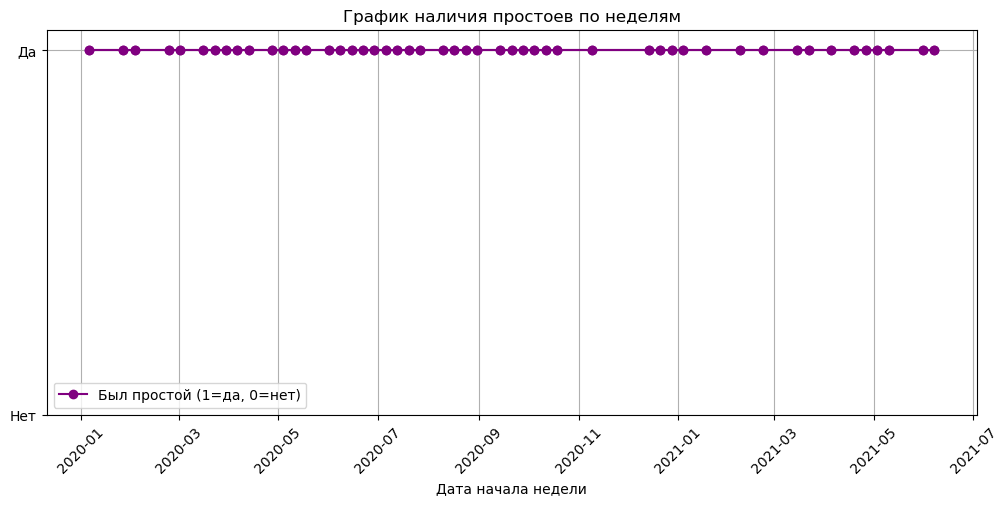

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Создаем новую колонку: неделя
df["Неделя_new"] = df["Начало простоя"].dropna().dt.to_period("W").apply(lambda r: r.start_time)

# Группируем: если в неделе был хотя бы один простой, ставим 1
df_weekly = df.groupby("Неделя_new").size().reset_index(name="Был_простой")
df_weekly["Был_простой"] = 1  # Раз в группе есть просто, ставим 1

# Строим график
plt.figure(figsize=(12, 5))
plt.plot(df_weekly["Неделя_new"][:50], df_weekly["Был_простой"][:50], marker="o", linestyle="-", color="purple", label="Был простой (1=да, 0=нет)")

plt.plot(df_weekly["Неделя_new"][:50], df_weekly["Был_простой"][:50], marker="o", linestyle="-", color="purple")


plt.xlabel("Дата начала недели")
# plt.ylabel("Наличие простоя (1 = был, 0 = не было)")
plt.title("График наличия простоев по неделям")
plt.yticks([0, 1], ["Нет", "Да"])
plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.show()


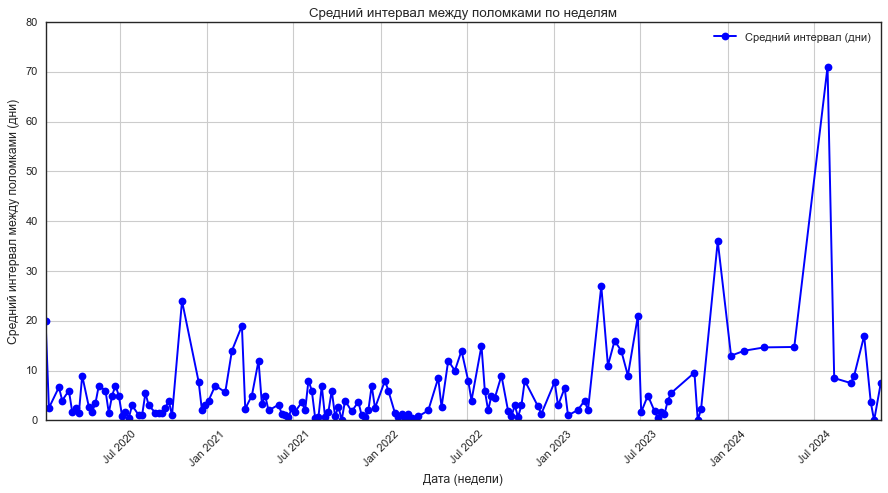

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Сортируем по времени начала простоя
df = df.sort_values(by="Начало простоя")

# Считаем интервалы между поломками
df["Интервал_между_поломками"] = df["Начало простоя"].diff().dt.days  # В днях
df1 = df.copy()
# Группируем по неделям
df_weekly = df.groupby(df["Начало простоя"].dt.to_period("W")).agg({
    "Интервал_между_поломками": "mean",
    "Длительность": "mean"  # Средняя длительность простоя
}).reset_index()

# Преобразуем период в дату для оси X
df_weekly["Дата"] = df_weekly["Начало простоя"].dt.start_time

# Строим график среднего интервала между поломками по неделям
plt.figure(figsize=(12, 6))
plt.plot(df_weekly["Дата"], df_weekly["Интервал_между_поломками"], marker="o", linestyle="-", color="blue", label="Средний интервал (дни)")
plt.xlabel("Дата (недели)")
plt.ylabel("Средний интервал между поломками (дни)")
plt.title("Средний интервал между поломками по неделям")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


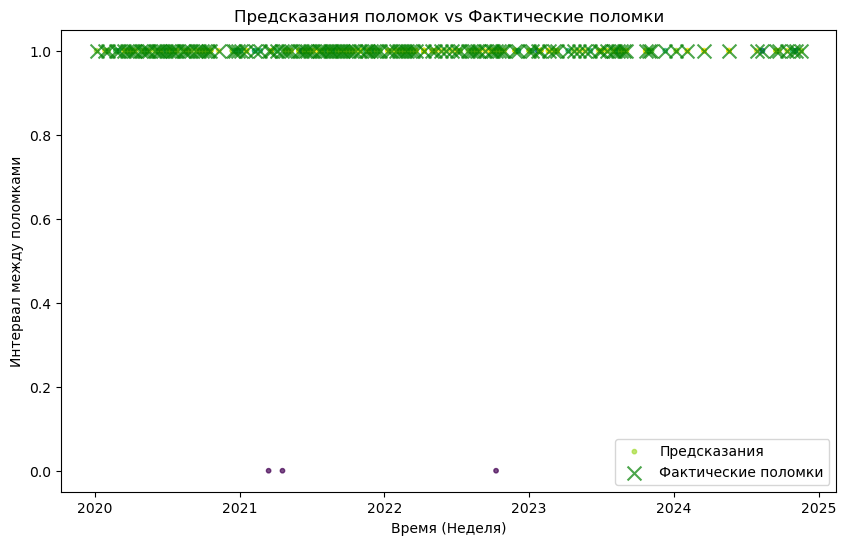

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np


df["will_be_down"] = df["will_be_down"].astype(int)
# Фильтруем только строки с предсказаниями поломок
predictions = df[['Неделя_new', 'P_failure', 'will_be_down']]

# Для фактических поломок будем использовать df_weekly
actual_failures = df_weekly[df_weekly['Был_простой'] == 1]

# Создадим случайный сдвиг для фактических поломок по оси Y
# np.random.seed(42)  # Для повторяемости
# y_offset = np.random.normal(scale=0.05, size=len(actual_failures))

# Визуализируем график
fig, ax = plt.subplots(figsize=(10, 6))

# Рисуем предсказания поломок, используя цвет для отображения вероятности
sc = ax.scatter(predictions['Неделя_new'], predictions['will_be_down'], c=predictions["P_failure"],
                 cmap='viridis', s=10, label="Предсказания", alpha=0.7)

# Добавляем фактические поломки на график с небольшим сдвигом по оси Y
ax.scatter(actual_failures['Неделя_new'], [list(map(float, np.ones_like(actual_failures['Неделя_new'])))],
           c='green', label="Фактические поломки", marker='x', s=100, alpha=0.7)

# Добавляем цветовую шкалу для вероятности
# plt.colorbar(sc, ax=ax, label="Вероятность поломки")

# Добавляем подписи и настраиваем график
ax.set_xlabel("Время (Неделя)")
ax.set_ylabel("Интервал между поломками")
ax.set_title("Предсказания поломок vs Фактические поломки")
ax.legend()

# plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()


## за весь период получилось не очень информативно, построим за каждый год

C:\Users\klgh2\AppData\Local\Temp\ipykernel_3376\1251181846.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions['Неделя_new_num'] = predictions['Неделя_new'].dt.date


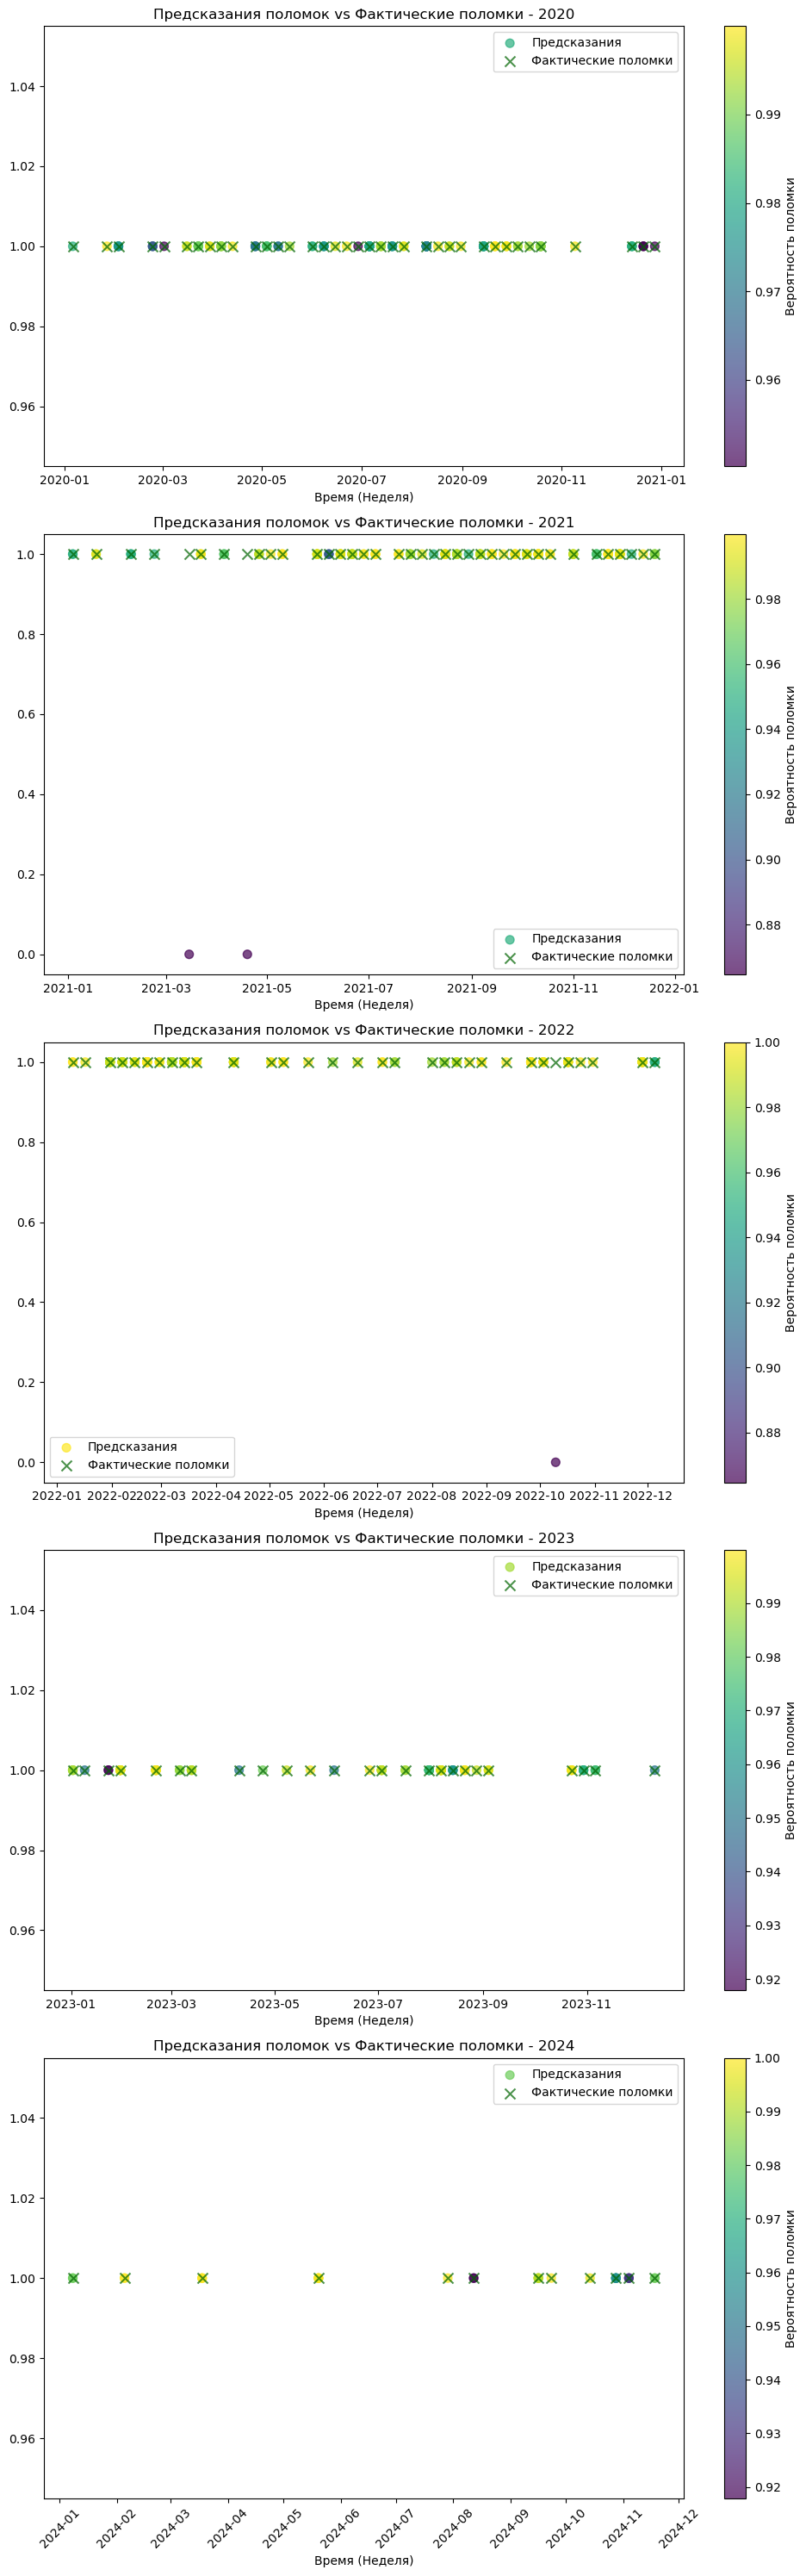

In [ ]:
# Фильтруем только строки с предсказаниями поломок
predictions = df[['Неделя_new', 'P_failure', 'will_be_down']]

# Для фактических поломок будем использовать df_weekly
actual_failures = df_weekly[df_weekly['Был_простой'] == 1]

# Конвертируем даты в числовой формат (например, количество дней с начала отсчета)
predictions['Неделя_new_num'] = predictions['Неделя_new'].dt.date
actual_failures['Неделя_new_num'] = actual_failures['Неделя_new'].dt.date

# Создаем случайный сдвиг для фактических поломок по оси Y
# np.random.seed(42)  # Для воспроизводимости
# y_offset = np.random.normal(scale=0.03, size=len(actual_failures))

# Получаем уникальные года из данных
years = predictions['Неделя_new'].dt.year.unique()

# Создаем 5 графиков (по одному на каждый год)
fig, axes = plt.subplots(min(5, len(years)), ncols=1, figsize=(10, 30))

for i, year in enumerate(years):
    if i == 5:
        continue
    # Фильтруем данные по году
    predictions_year = predictions[predictions['Неделя_new'].dt.year == year]
    actual_failures_year = actual_failures[actual_failures['Неделя_new'].dt.year == year]
    # print(predictions_year['will_be_down'])
    # Рисуем предсказания поломок, используя цвет для отображения вероятности
    sc = axes[i].scatter(predictions_year['Неделя_new_num'], predictions_year['will_be_down'],
                         c=predictions_year['P_failure'], cmap='viridis', s=50, label="Предсказания", alpha=0.7)

    # Добавляем фактические поломки на график
    axes[i].scatter(actual_failures_year['Неделя_new_num'], np.ones_like(actual_failures_year['Неделя_new_num']),
                    c='darkgreen', label="Фактические поломки", marker='x', s=75, alpha=0.7)

    # Добавляем цветовую шкалу для вероятности
    plt.colorbar(sc, ax=axes[i], label="Вероятность поломки")

    # Добавляем подписи и настраиваем график
    axes[i].set_xlabel("Время (Неделя)")
    # axes[i].set_ylabel("Интервал между поломками")
    axes[i].set_title(f"Предсказания поломок vs Фактические поломки - {int(year)}")
    axes[i].legend()

# Вращаем метки на осях x для лучшей читаемости
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


    Неделя_new  P_failure  will_be_down
0   2020-01-06   0.981684          True
1   2020-01-27   0.999877          True
2   2020-02-03   0.976482          True
3   2020-02-03   0.976482          True
4   2020-02-03   0.976482          True
..         ...        ...           ...
527 2024-11-04   0.930517          True
528 2024-11-04   0.930517          True
529 2024-11-18   0.981684          True
530 2024-11-18   0.981684          True
531        NaT        NaN         False

[532 rows x 3 columns]


C:\Users\klgh2\AppData\Local\Temp\ipykernel_3376\3121390873.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions['Неделя_new_num'] = predictions['Неделя_new'].dt.date


AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

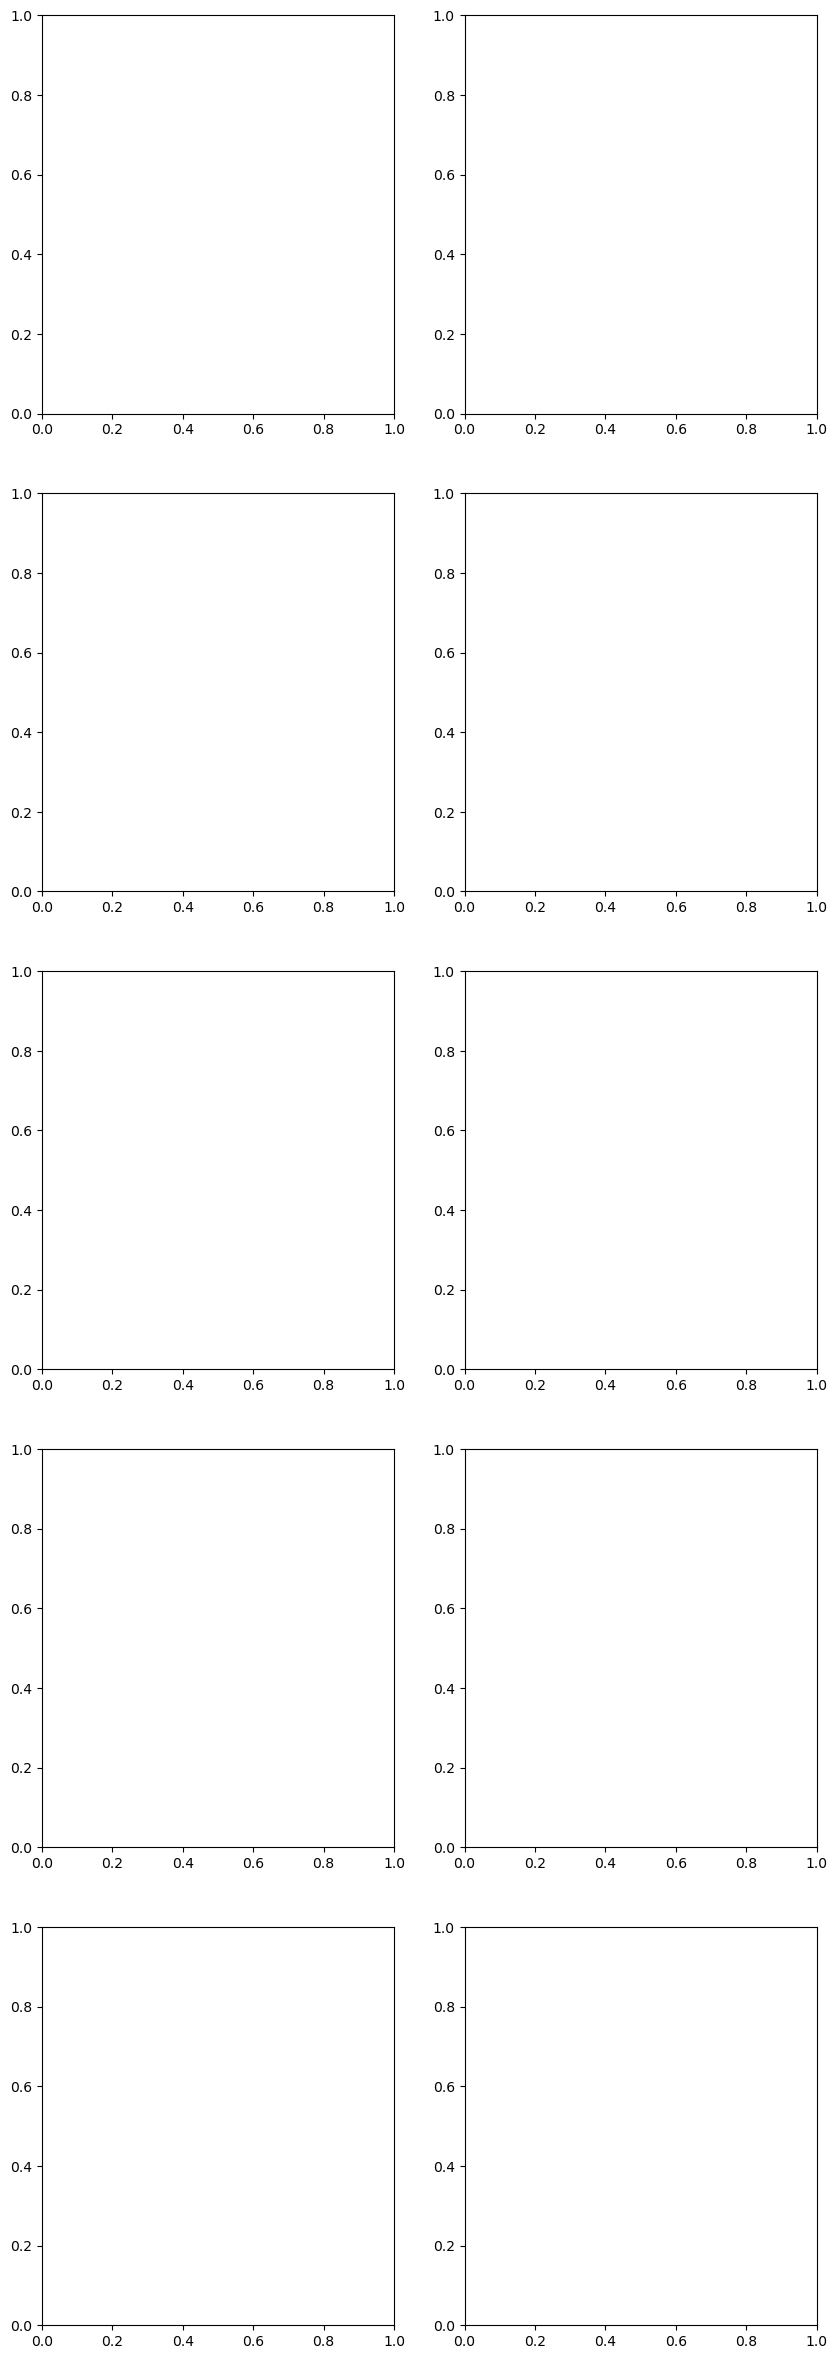

In [ ]:
# Фильтруем только строки с предсказаниями поломок
predictions = df[['Неделя_new', 'P_failure', 'will_be_down']]
print(predictions)
# Для фактических поломок будем использовать df_weekly
actual_failures = df_weekly[df_weekly['Был_простой'] == 1]

# Конвертируем даты в числовой формат (например, количество дней с начала отсчета)
predictions['Неделя_new_num'] = predictions['Неделя_new'].dt.date
actual_failures['Неделя_new_num'] = actual_failures['Неделя_new'].dt.date

# Создаем случайный сдвиг для фактических поломок по оси Y
# np.random.seed(42)  # Для воспроизводимости
# y_offset = np.random.normal(scale=0.03, size=len(actual_failures))

# Получаем уникальные года из данных
years = predictions['Неделя_new'].dt.year.unique()

# Создаем 5 графиков (по одному на каждый год)
fig, axes = plt.subplots(min(5, len(years)), ncols=2, figsize=(10, 30))

for i, year in enumerate(years):
    if i == 5:
        continue
    # Фильтруем данные по году
    predictions_year = predictions[predictions['Неделя_new'].dt.year == year]
    actual_failures_year = actual_failures[actual_failures['Неделя_new'].dt.year == year]
    # print(predictions_year['will_be_down'])
    # Рисуем предсказания поломок, используя цвет для отображения вероятности
    sc = axes[i].scatter(predictions_year['Неделя_new_num'], predictions_year['will_be_down'],
                         c=predictions_year['P_failure'], cmap='viridis', s=50, label="Предсказания", alpha=0.7)

    # Добавляем фактические поломки на график
    axes[i].scatter(actual_failures_year['Неделя_new_num'], np.ones_like(actual_failures_year['Неделя_new_num']),
                    c='darkgreen', label="Фактические поломки", marker='x', s=75, alpha=0.7)

    # Добавляем цветовую шкалу для вероятности
    plt.colorbar(sc, ax=axes[i], label="Вероятность поломки")

    # Добавляем подписи и настраиваем график
    axes[i].set_xlabel("Время (Неделя)")
    # axes[i].set_ylabel("Интервал между поломками")
    axes[i].set_title(f"Предсказания поломок vs Фактические поломки - {int(year)}")
    axes[i].legend()

# Вращаем метки на осях x для лучшей читаемости
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
lambda_coef = 6.120527306967985


    Неделя_new  P_failure  will_be_down
0   2020-01-06   0.981684          True
1   2020-01-27   0.999877          True
2   2020-02-03   0.976482          True
3   2020-02-03   0.976482          True
4   2020-02-03   0.976482          True
..         ...        ...           ...
527 2024-11-04   0.930517          True
528 2024-11-04   0.930517          True
529 2024-11-18   0.981684          True
530 2024-11-18   0.981684          True
531        NaT        NaN         False

[532 rows x 3 columns]


C:\Users\klgh2\AppData\Local\Temp\ipykernel_3376\2335793031.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions['Неделя_new_num'] = predictions['Неделя_new'].dt.date


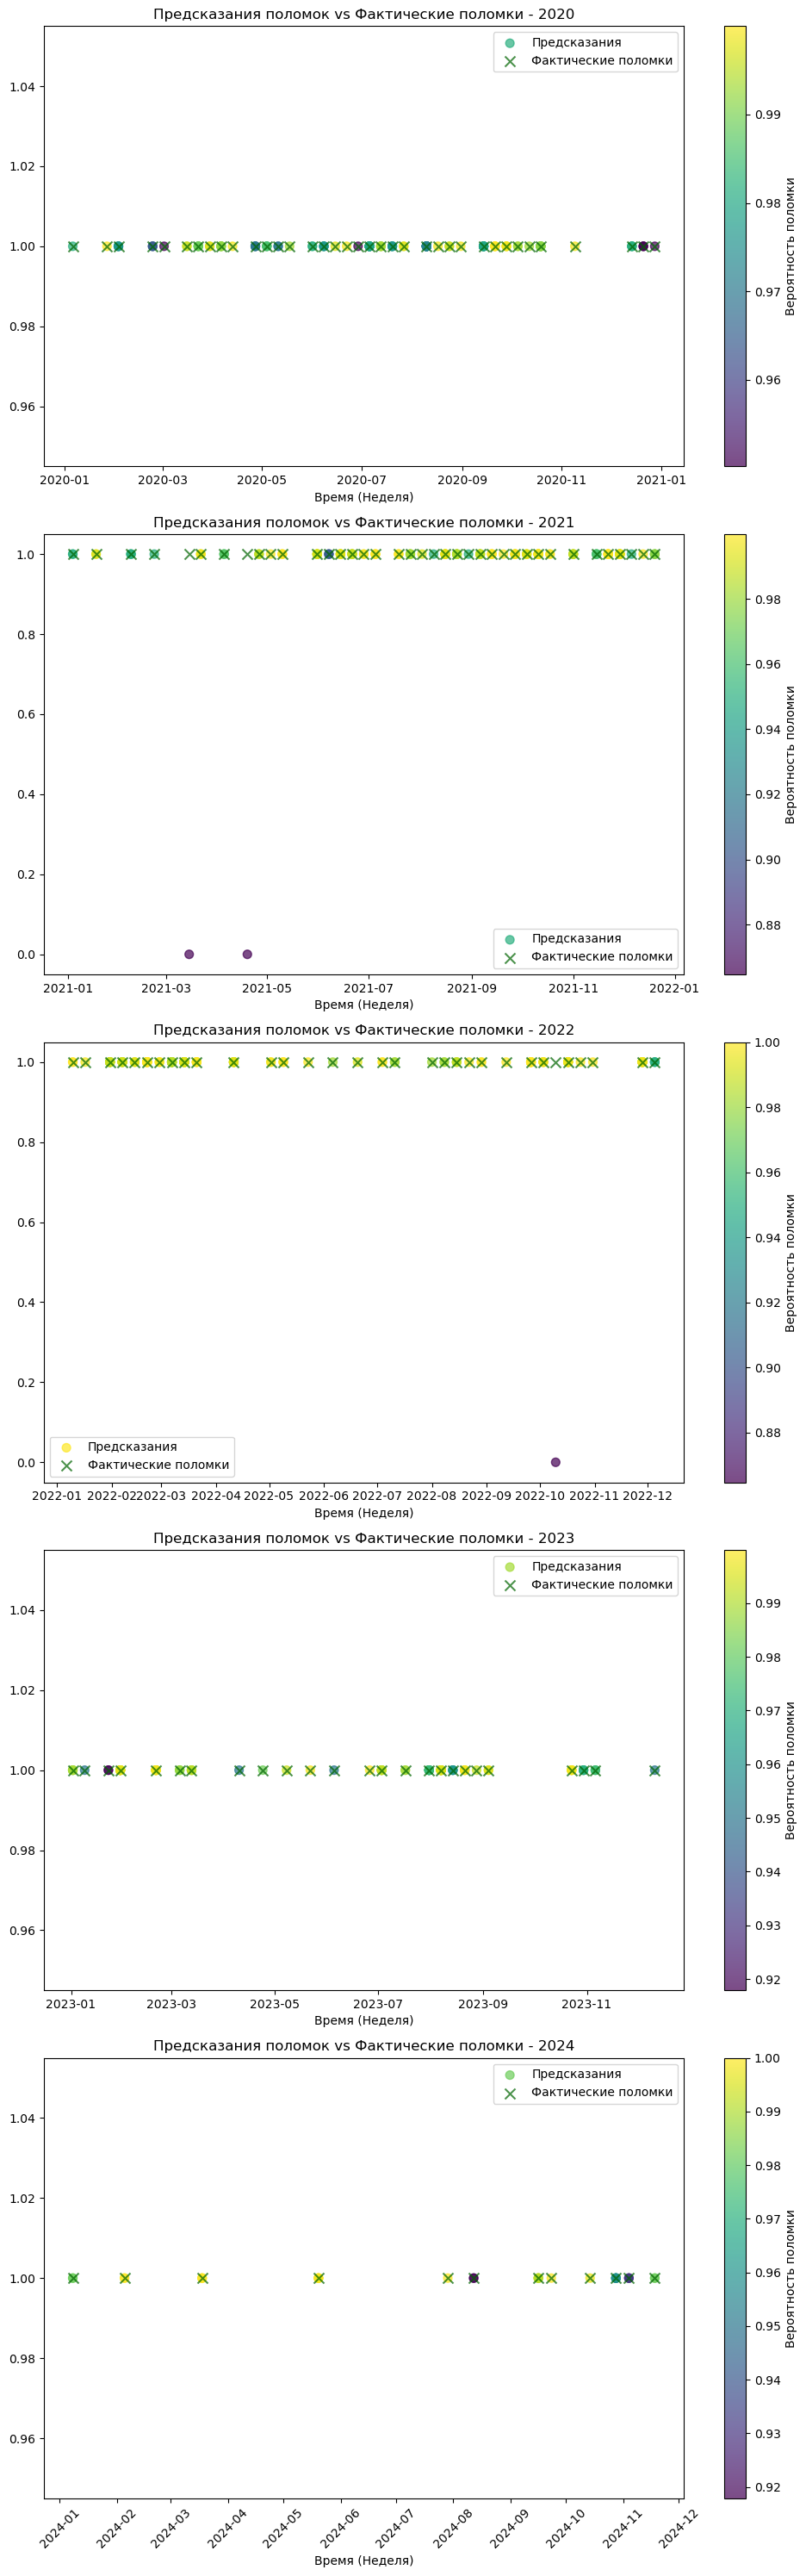

In [ ]:
# Фильтруем только строки с предсказаниями поломок
predictions = df[['Неделя_new', 'P_failure', 'will_be_down']]
print(predictions)
# Для фактических поломок будем использовать df_weekly
actual_failures = df_weekly[df_weekly['Был_простой'] == 1]

# Конвертируем даты в числовой формат (например, количество дней с начала отсчета)
predictions['Неделя_new_num'] = predictions['Неделя_new'].dt.date
actual_failures['Неделя_new_num'] = actual_failures['Неделя_new'].dt.date

# Создаем случайный сдвиг для фактических поломок по оси Y
# np.random.seed(42)  # Для воспроизводимости
# y_offset = np.random.normal(scale=0.03, size=len(actual_failures))

# Получаем уникальные года из данных
years = predictions['Неделя_new'].dt.year.unique()

# Создаем 5 графиков (по одному на каждый год)
fig, axes = plt.subplots(min(5, len(years)), ncols=1, figsize=(10, 30))

for i, year in enumerate(years):
    if i == 5:
        continue
    # Фильтруем данные по году
    predictions_year = predictions[predictions['Неделя_new'].dt.year == year]
    actual_failures_year = actual_failures[actual_failures['Неделя_new'].dt.year == year]
    # print(predictions_year['will_be_down'])
    # Рисуем предсказания поломок, используя цвет для отображения вероятности
    sc = axes[i].scatter(predictions_year['Неделя_new_num'], predictions_year['will_be_down'],
                         c=predictions_year['P_failure'], cmap='viridis', s=50, label="Предсказания", alpha=0.7)

    # Добавляем фактические поломки на график
    axes[i].scatter(actual_failures_year['Неделя_new_num'], np.ones_like(actual_failures_year['Неделя_new_num']),
                    c='darkgreen', label="Фактические поломки", marker='x', s=75, alpha=0.7)

    # Добавляем цветовую шкалу для вероятности
    plt.colorbar(sc, ax=axes[i], label="Вероятность поломки")

    # Добавляем подписи и настраиваем график
    axes[i].set_xlabel("Время (Неделя)")
    # axes[i].set_ylabel("Интервал между поломками")
    axes[i].set_title(f"Предсказания поломок vs Фактические поломки - {int(year)}")
    axes[i].legend()

# Вращаем метки на осях x для лучшей читаемости
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('r.csv')